# Customer Segmentation with k-Prototypes Clustering

We will use a clustering based approach to group customers into segments.

This is a form of unsupervised learning. 

The purpose of customer segmentation is to understand our customer base better, and can be used as an exploratory starting point before further analysis.

# k-Prototypes Clustering

k-prototypes is a more general version of the popular k-means clustering.

k-means clustering aims to cluster data points such that we minimize the sum of squared distances between each data point and its cluster's centroid. It only applies to continuous variables.

k-modes clustering aims to cluster **categorical** data points such that we minimize the number of mismatches between each data point and its cluster's centroid. 

In k-prototypes clustering, we use k-means clustering for the continuous variables, but we use k-modes clustering for categorical variables. Therefore, we use a combined dissimilarity metric (sum of squared distance for continuous variables, and the mismatch count for the categorical variable to assign each data point to a cluster)

In [1]:
import importlib
import pandas as pd
import utils

#include k-means explanation above

In [2]:
importlib.reload(utils)

<module 'utils' from '/Users/nicolearitranair/ml-basics/notebook/utils.py'>

In [3]:
import numpy as np

df = utils.get_customer_segmentation_data()
df

,Customer_ID,Age,Gender,CreditScore,Tenure,Balance,NumOfProducts,Education,HasCrCard,Transaction_Count,Avg_Transaction_Value,EstimatedSalary
2,3,61,M,783,9,199491.201077,5,6,1,4,456.757338,141604.141688
544,545,69,M,817,9,195704.837129,5,6,1,4,421.792904,146285.764930
2,3,42,F,844,6,148425.672167,1,5,1,4,112.587853,125037.237781
414,415,47,F,801,6,124493.943216,1,6,0,4,246.654154,118640.439117
188,189,66,M,845,9,194538.137261,5,6,1,4,459.739147,146133.017866
...,...,...,...,...,...,...,...,...,...,...,...,...
817,818,18,M,354,0,3564.266154,1,2,0,1,49.857074,46305.513004
546,547,60,M,805,9,197233.837333,5,6,1,4,424.040554,142895.963034
382,383,64,M,785,9,194796.772163,5,6,1,4,417.931295,141579.432170
177,178,24,M,372,0,6271.643095,1,2,0,1,31.878611,29621.236118


In [4]:
df.to_csv("output_data/customer-segmentation-data.csv", index=False)

In [5]:
df

,Customer_ID,Age,Gender,CreditScore,Tenure,Balance,NumOfProducts,Education,HasCrCard,Transaction_Count,Avg_Transaction_Value,EstimatedSalary
2,3,61,M,783,9,199491.201077,5,6,1,4,456.757338,141604.141688
544,545,69,M,817,9,195704.837129,5,6,1,4,421.792904,146285.764930
2,3,42,F,844,6,148425.672167,1,5,1,4,112.587853,125037.237781
414,415,47,F,801,6,124493.943216,1,6,0,4,246.654154,118640.439117
188,189,66,M,845,9,194538.137261,5,6,1,4,459.739147,146133.017866
...,...,...,...,...,...,...,...,...,...,...,...,...
817,818,18,M,354,0,3564.266154,1,2,0,1,49.857074,46305.513004
546,547,60,M,805,9,197233.837333,5,6,1,4,424.040554,142895.963034
382,383,64,M,785,9,194796.772163,5,6,1,4,417.931295,141579.432170
177,178,24,M,372,0,6271.643095,1,2,0,1,31.878611,29621.236118


# Normalizing the input data

We use min-max normalization on all the continuous features in the input data. 

The purpose of min-max normalization is to ensure that features with "larger" ranges do not dominate the clustering process compared to features with "smaller" ranges.

For example, "Balance" might have a much larger range than "Age" so we want to control for this.

In [6]:
df_to_cluster_normalize  = df.iloc[:,1:].copy()

continuous_columns = ["Age", "CreditScore", "Tenure", "Balance", "NumOfProducts", "Transaction_Count", "Avg_Transaction_Value", "EstimatedSalary"]
mins_dict = {}
maxes_dict = {}

for col in continuous_columns:
    print(col)
    #rescale the continuous data
    mins_dict[col] = df_to_cluster_normalize[col].min()
    maxes_dict[col] = df_to_cluster_normalize[col].max()
    df_to_cluster_normalize[col] = (df_to_cluster_normalize[col]-df_to_cluster_normalize[col].min())/(df_to_cluster_normalize[col].max()-df_to_cluster_normalize[col].min())

Age
CreditScore
Tenure
Balance
NumOfProducts
Transaction_Count
Avg_Transaction_Value
EstimatedSalary


# Determine an appropriate number of clusters

Since we are not sure of how the customers should be segmented, we can first use the Elbow Method to determine an appropriate number of clusters.

In the Elbow Method, we will calculate
- within-cluster sum of squares (compared to centroid) for continuous variables
- total number of category mismatches with centroid for the categorical variables

Logically, we will always observe a decrease in the cost, and we want to find the "elbow" point in cost reduction that tells us to stop increasing clusters.

In the plot below, we can see that it clearly occurs at 3 clusters.

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 4747.943602978722
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 4747.943602978722
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 4747.943602978722
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 4747.943602978722
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 4747.943602978722
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 825, ncost: 1485.444080494123
Run: 1, iteration: 2/100, moves: 0, ncost: 1485.444080494123
Init: initializing centroids
Init: initializing clusters
Starting ite

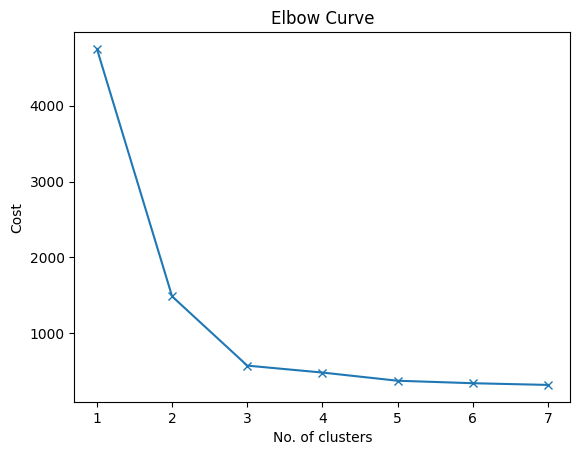

In [7]:
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
# Elbow curve to find optimal K 

cost = [] 
kmode_models = []
K = [1, 2, 3, 4, 5, 6, 7]
for k in list(K): 
    kmode = KPrototypes(n_clusters=k, init = "random", n_init = 5, verbose=1) 
    kmode.fit_predict(df_to_cluster_normalize, categorical=[1, 6, 7]) 
    cost.append(kmode.cost_)
    kmode_models.append(kmode)
      
plt.plot(K, cost, 'x-') 
plt.xlabel('No. of clusters') 
plt.ylabel('Cost') 
plt.title('Elbow Curve') 
plt.show()

In [8]:
from kmodes.kprototypes import KPrototypes

kmode = KPrototypes(n_clusters=3, init = "random", n_init = 5, verbose=1, random_state=12345) 
kmode.fit_predict(df_to_cluster_normalize, categorical=[1, 6, 7]) 

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 17, ncost: 572.6163818061661
Run: 1, iteration: 2/100, moves: 0, ncost: 572.6163818061661
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 923, ncost: 580.9344727226974
Run: 2, iteration: 2/100, moves: 97, ncost: 572.6163818061659
Run: 2, iteration: 3/100, moves: 0, ncost: 572.6163818061659
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 789, ncost: 572.6163818061659
Run: 3, iteration: 2/100, moves: 0, ncost: 572.6163818061659
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 137, ncost: 1463.8740991572256
Run: 4, iter

array([1, 1, 2, ..., 1, 0, 1], dtype=uint16)

In [9]:
df_to_cluster_normalize["Label"] = kmode.labels_

In [10]:
kmode.cluster_centroids_

array([['0.05868627450980439', '0.08722768670309657',
        '0.05111111111111156', '0.02488662538325421', '0.0', '0.0',
        '0.030910681203328547', '0.11527076688720035', 'F', '2', '0'],
       ['0.9108039215686349', '0.9077978142076508', '0.9999999999999474',
        '0.9749570897514573', '0.9003999999999931', '1.0',
        '0.8964774119643334', '0.9618598890015831', 'M', '6', '1'],
       ['0.5734509803921544', '0.9542841530054633', '0.6123333333333253',
        '0.6232384779206038', '9.103828801926283e-17', '1.0',
        '0.373866283005761', '0.8041981101578033', 'F', '6', '0']],
      dtype='<U32')

# Analyzing the customer segments

First, let's look at the categorical variables.

We can see that cluster 0 is made of a femal majority, with a medium level of education and who tend to not have credit cards. 

Cluster 1 is made up of a male majority, with a low level of education and who tend to not have credit cards.

Cluster 2 is made up of a highly educated male majority who tend to have credit cards.

In [11]:
pd.DataFrame(kmode.cluster_centroids_).iloc[:,-3:].rename(columns={8:"Gender", 9:"Education", 10:"HasCrCard"})

,Gender,Education,HasCrCard
0,F,2,0
1,M,6,1
2,F,6,0


Let's look in more detail at the frequency distribution of the categorical variables within these 3 clusters.

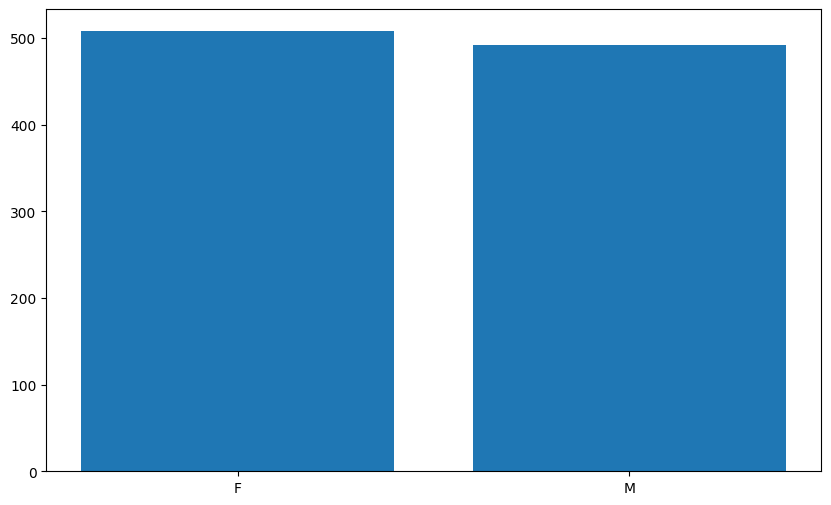

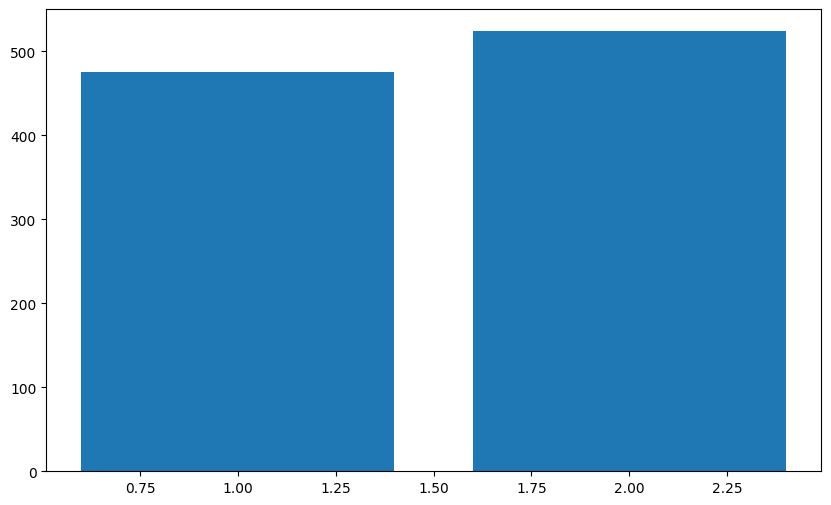

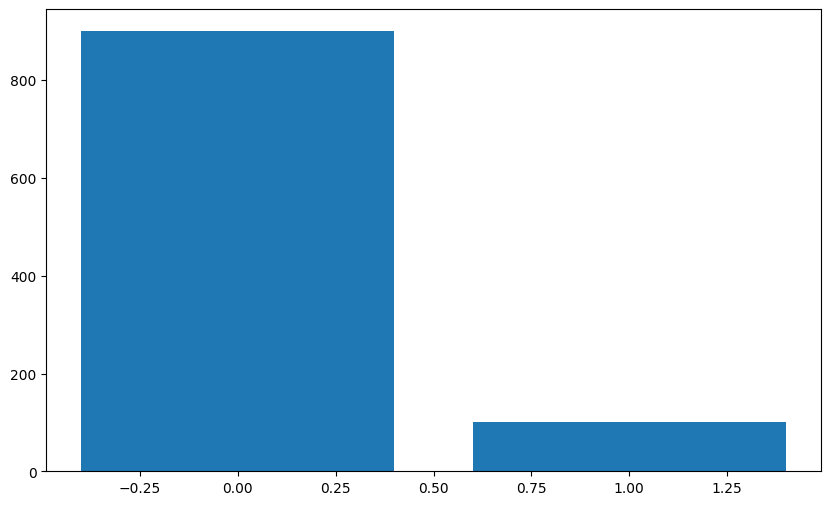

In [12]:
gender_vc = df_to_cluster_normalize[df_to_cluster_normalize["Label"]==0]["Gender"].value_counts()
education_vc = df_to_cluster_normalize[df_to_cluster_normalize["Label"]==0]["Education"].value_counts()
has_cc_vc = df_to_cluster_normalize[df_to_cluster_normalize["Label"]==0]["HasCrCard"].value_counts()

plt.figure(figsize=(10,6))
plt.bar(gender_vc.index, gender_vc)
plt.show()

plt.figure(figsize=(10,6))
plt.bar(education_vc.index, education_vc)
plt.show()

plt.figure(figsize=(10,6))
plt.bar(has_cc_vc.index, has_cc_vc)
plt.show()

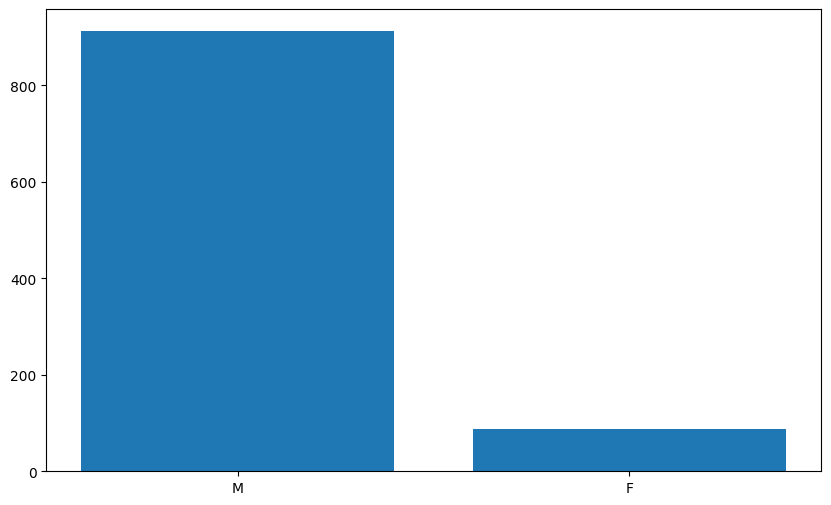

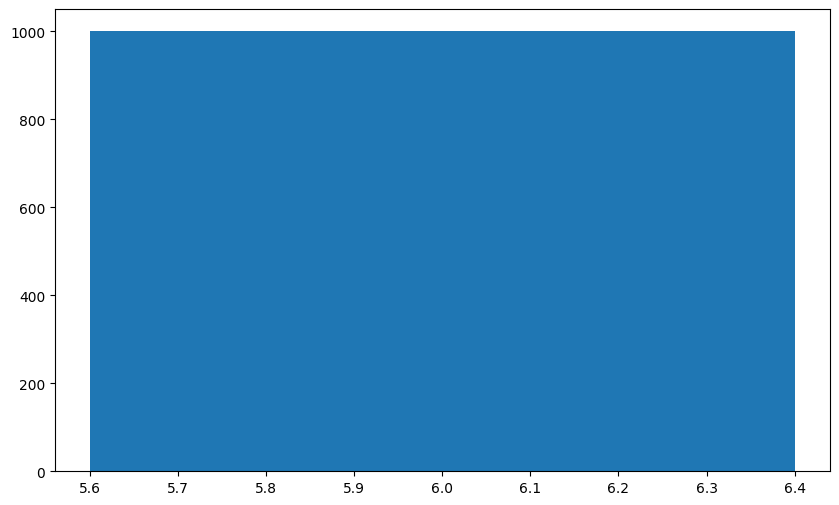

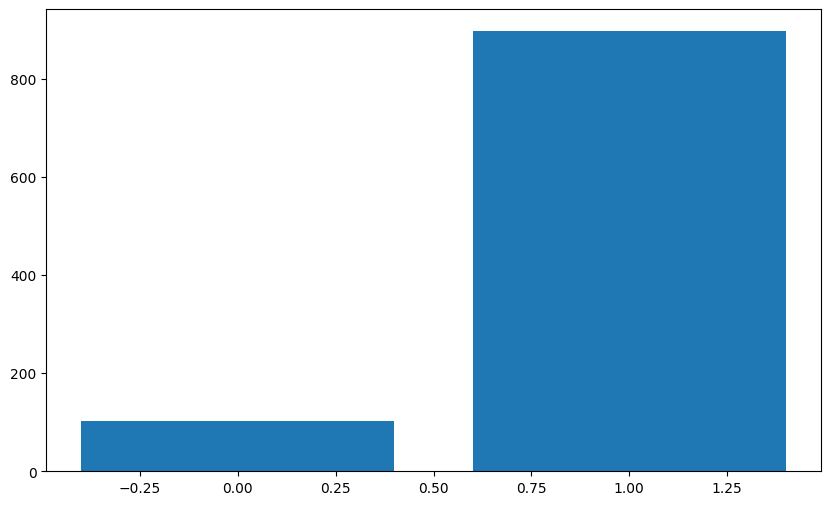

In [13]:
gender_vc = df_to_cluster_normalize[df_to_cluster_normalize["Label"]==1]["Gender"].value_counts()
education_vc = df_to_cluster_normalize[df_to_cluster_normalize["Label"]==1]["Education"].value_counts()
has_cc_vc = df_to_cluster_normalize[df_to_cluster_normalize["Label"]==1]["HasCrCard"].value_counts()

plt.figure(figsize=(10,6))
plt.bar(gender_vc.index, gender_vc)
plt.show()

plt.figure(figsize=(10,6))
plt.bar(education_vc.index, education_vc)
plt.show()

plt.figure(figsize=(10,6))
plt.bar(has_cc_vc.index, has_cc_vc)
plt.show()

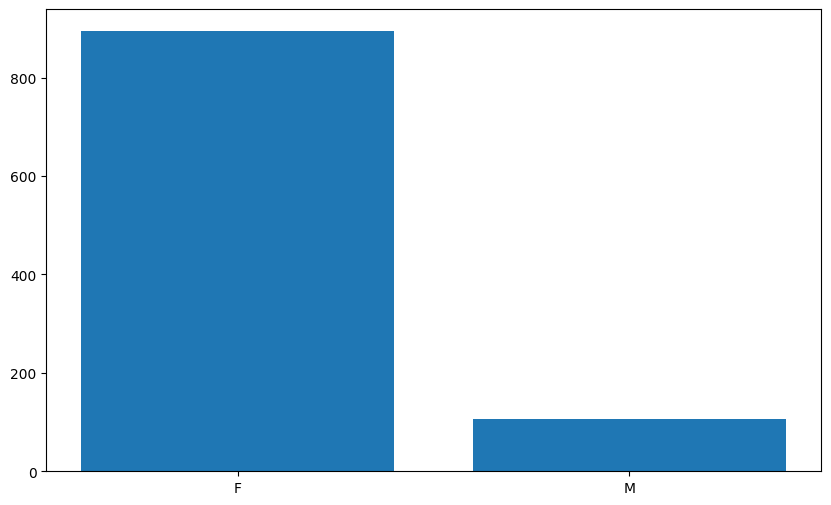

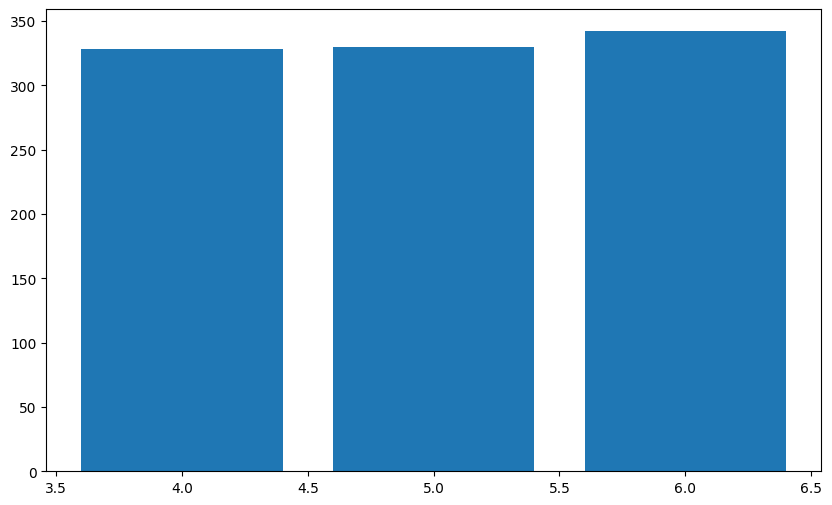

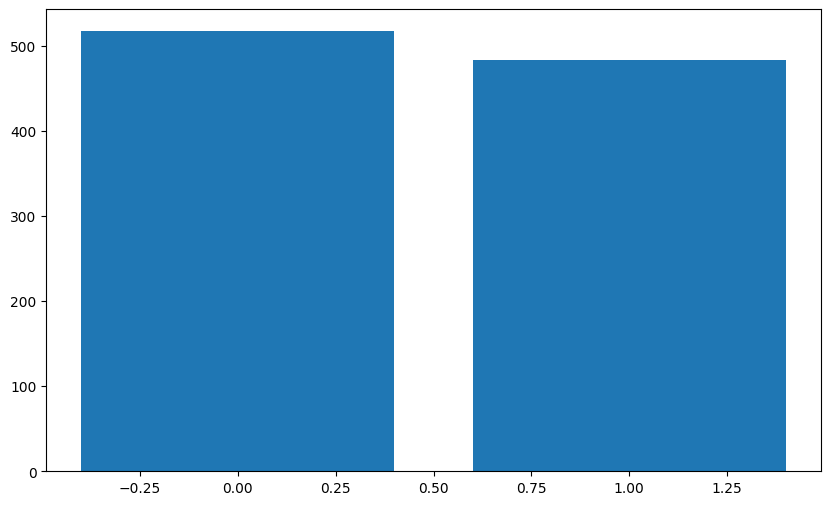

In [14]:
gender_vc = df_to_cluster_normalize[df_to_cluster_normalize["Label"]==2]["Gender"].value_counts()
education_vc = df_to_cluster_normalize[df_to_cluster_normalize["Label"]==2]["Education"].value_counts()
has_cc_vc = df_to_cluster_normalize[df_to_cluster_normalize["Label"]==2]["HasCrCard"].value_counts()

plt.figure(figsize=(10,6))
plt.bar(gender_vc.index, gender_vc)
plt.show()

plt.figure(figsize=(10,6))
plt.bar(education_vc.index, education_vc)
plt.show()

plt.figure(figsize=(10,6))
plt.bar(has_cc_vc.index, has_cc_vc)
plt.show()

From the plots above, we can see that 
- the gender disparity in cluster 2 & 1 are much more pronounced than in cluster 0 and in that there are many more males in cluster 1, and many more females in cluster 2.
- the credit card disparity in cluster 0 and 1 are much more pronounced in that most people in cluster 0 do not have a credit card and most people in cluster 1 have a credit card.
- customers in cluster 1 are much more educated, customers in cluster 0 have a low education level, and customers in cluster 2 have a medium education level. Education seems to be a clear distinction between the clusters.

Before we look at the characteristics of the clusters overall, let's take a look at the continuous features as well:

In [15]:
import plotly.express as px
import plotly.graph_objects as go

n_clust = 3
attributes = [x for x in df_to_cluster_normalize.columns[:-1] if x in continuous_columns]
colors=['purple','yellow','red']#,'magenta','orange', 'green', 'pink'
cluster=[f'Cluster {i}' for i in range(n_clust)]

fig = go.Figure()
for index in range(0,n_clust):
    fig.add_trace(go.Scatterpolar(r=df_to_cluster_normalize.loc[df_to_cluster_normalize.Label == index, attributes].mean(),
                                  theta=attributes,
                                  fill='toself',
#                                   fillcolor=colors[index],
                                  opacity=1,
                                  name=cluster[index]))
    
fig.update_layout(polar=dict(radialaxis=dict(visible=True)),showlegend=True,
                  title="Radar plot - Cluster attributes (Normalized Values)")
fig.show()

# Overall Analysis

Looking at both the categorical & continuous features, a picture begins to emerge:
- Cluster 0 seems to be made up of lower income, lower educated men and women. They tend to have less in their bank accounts, and to spend less. 
- Cluster 1 seems to be made up high income, highly educated men, who already use the most number of products. Nevertheless, due to their great spending power, it may be important to continuously market towards them.
- Cluster 2 seems to be made up of middle income, medium educated women, middle aged women. They tend to have excellent credit scores, and medium salaries & account balances. They are subscribed to very few products and this may be a good demographic to market new products towards.


# Assigning a cluster to a new user

Finally, if we have a new bank user, we might want to classify them into a cluster. An example why we might do this is perhaps we have used the cluster assignments as inputs to other ML models, therefore to run those, we might want to assign the user to a cluster first.

In [16]:
new = np.array(
    [[(45-mins_dict["Age"])/(maxes_dict["Age"]-mins_dict["Age"]), 
      (800-mins_dict["CreditScore"])/(maxes_dict["CreditScore"]-mins_dict["CreditScore"]),  
      (8-mins_dict["Tenure"])/(maxes_dict["Tenure"]-mins_dict["Tenure"]),  
      (70000-mins_dict["Balance"])/(maxes_dict["Balance"]-mins_dict["Balance"]),  
      (1-mins_dict["NumOfProducts"])/(maxes_dict["NumOfProducts"]-mins_dict["NumOfProducts"]),  
      (1-mins_dict["Transaction_Count"])/(maxes_dict["Transaction_Count"]-mins_dict["Transaction_Count"]),
      (200-mins_dict["Avg_Transaction_Value"])/(maxes_dict["Avg_Transaction_Value"]-mins_dict["Avg_Transaction_Value"]),
      (100000-mins_dict["EstimatedSalary"])/(maxes_dict["EstimatedSalary"]-mins_dict["EstimatedSalary"]),
      0, 
      4, 
      0]])
kmode.predict(new, categorical=[8, 9, 10])


array([2], dtype=uint16)

Here the user has been assigned to cluster 1. This makes sense as she is a middle income female, who has purchased only 1 product.